# NLP Sentiment Classification Project

## Data loading & Exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('yelp.csv')

### Display the first 10 rows

In [2]:
df.head(10)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
5,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,4,3,1
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4
7,hW0Ne_HTHEAgGF1rAdmR-g,2012-07-12,JL7GXJ9u4YMx7Rzs05NfiQ,4,"Luckily, I didn't have to travel far to make m...",review,1ieuYcKS7zeAv_U15AB13A,0,1,0
8,wNUea3IXZWD63bbOQaOH-g,2012-08-17,XtnfnYmnJYi71yIuGsXIUA,4,Definitely come for Happy hour! Prices are ama...,review,Vh_DlizgGhSqQh4qfZ2h6A,0,0,0
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,0,1,0


### Print out our columns

In [3]:
print(df.columns)

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')


### Dataset summary

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


### Plot a histogram to check the reviews text length

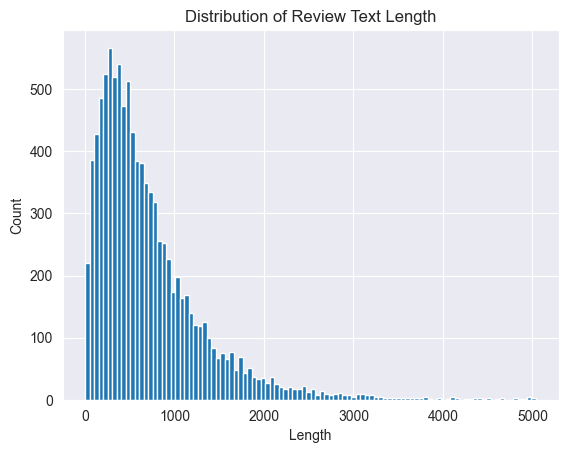

In [5]:
from matplotlib import pyplot as plt
df.text.str.len().hist(bins=100)
plt.xlabel("Length")
plt.ylabel("Count")
plt.title("Distribution of Review Text Length")
plt.show()

### Check random index review rating and its text representation

In [6]:
N = 200
print("Sample review rating:", df.iloc[N].stars)
print("Sample review text:", df.iloc[N].text)

Sample review rating: 5
Sample review text: Who dosen't like Cosco, I love this place. The pizza is cheap and good.


### Let's look at how many reviews fall into each rating category using seaborn's displot

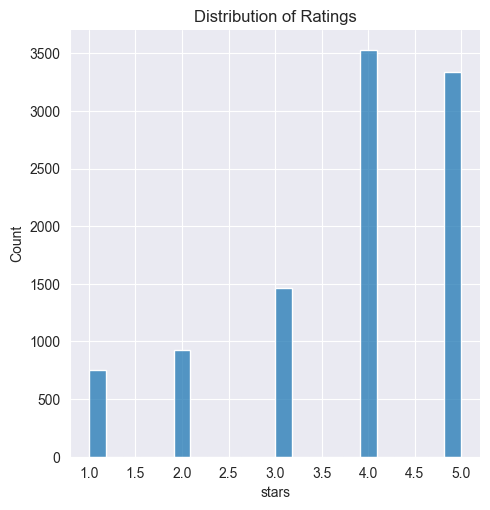

In [7]:
import seaborn as sns
sns.displot(df["stars"])
plt.title("Distribution of Ratings")
plt.show()

### Data Preprocessing

In [8]:
df = pd.read_csv('yelp.csv')

### Mapping 1-star reviews to represent negative sentiment 0 and 5-star reviews to represent positive sentiment 1

In [9]:
df = df[(df["stars"] == 1) | (df["stars"] == 5)]
df["label"] = df["stars"].map({1: 0, 5: 1})

X_Data = df["text"]
Y_Data = df["label"]

## Converting text data into its numerical representations using the sentence transformer model

In [10]:
from typing import List 
import sentence_transformers
from sentence_transformers import SentenceTransformer
sentence_transformer = SentenceTransformer("all-MiniLM-L6-v2")


def get_text_embeddings(encoder, text: List[str]) -> List[np.ndarray]:
    return encoder.encode(text)

C:\python\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [11]:
texts = df.text.tolist()

In [12]:
embeddings = get_text_embeddings(sentence_transformer, texts)

### Check its shape, first embedding length and its norm

In [13]:
embeddings.shape

(4086, 384)

In [14]:
len(embeddings[0])

384

In [15]:
np.linalg.norm(embeddings[0])

0.99999994

In [16]:
df = df.assign(embeddings = [e for e in embeddings])

### Use feather function to write it into a binary file

In [17]:
df.reset_index(inplace=True)
df.to_feather("yelp_with_embeddings.bin")

## Model building

In [18]:
import torch
from torch import nn

class ReviewClassifier(nn.Module):
    def __init__(self, input_dim=384, hidden_dim1=150, hidden_dim2=15, output_dim=1):
        super(ReviewClassifier, self).__init__()
        self.mlp = nn.Sequential(
            nn.Linear(input_dim, hidden_dim1),
            nn.ReLU(),
            nn.Linear(hidden_dim1, hidden_dim2),
            nn.ReLU(),
            nn.Linear(hidden_dim2, output_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.mlp(x)

In [19]:
df = pd.read_feather("yelp_with_embeddings.bin")

### Numerical representations of text reviews

In [20]:
df.embeddings[0]

array([-2.69870870e-02,  1.21111218e-02,  1.03444263e-01,  5.85587248e-02,
       -6.46284223e-02, -1.29983127e-02, -6.94513842e-02, -4.23906259e-02,
       -4.72875647e-02, -7.47565776e-02,  2.75893311e-04, -1.09934276e-02,
       -2.56671179e-02, -6.28251210e-02, -1.99138708e-02, -7.65453056e-02,
        1.74198315e-01, -1.34243011e-01, -1.75687019e-02, -4.12424356e-02,
       -1.09441169e-01, -4.82605211e-02,  4.82458770e-02, -1.33555774e-02,
        5.59582375e-02,  5.01586609e-02,  2.06091125e-02,  4.79414314e-02,
       -4.90631424e-02, -4.00309227e-02, -2.74517313e-02,  6.48624748e-02,
       -4.05024402e-02, -4.38724458e-03, -2.46323515e-02,  4.45185751e-02,
        9.24157351e-02, -1.14275217e-01,  5.28180040e-02, -3.53384792e-04,
        2.43185665e-02, -4.42525595e-02,  5.36391996e-02, -2.23462954e-02,
        2.35288702e-02,  4.34743753e-03, -1.30336974e-02,  4.99515906e-02,
       -1.54166203e-02, -6.97716419e-03, -2.35754829e-02,  2.09900853e-03,
        3.75692360e-02, -

In [21]:
df.embeddings[0].shape

(384,)

In [22]:
df.shape

(4086, 13)

### Shuffling and splitting our data into training, validation and test data frames

In [23]:
df = df.sample(frac=1.0)
train_df = df[:2500]
val_df = df[2500:4000]
test_df = df[4000:]

## Model Evaluation

In [24]:
import torch
from torchmetrics import Accuracy
from tqdm.notebook import tqdm 
from torch.utils.tensorboard import SummaryWriter

# setup
writer = SummaryWriter()
model = ReviewClassifier()
bce_loss = torch.nn.BCELoss()

batch_size = 128
adam_optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)
nr_of_epochs = 60
losses = []

# Training Loop
for epoch in tqdm(range(nr_of_epochs)):
    # shuffle 
    train_df = train_df.sample(frac=1.0)
    current_index = 0 
    while current_index < len(train_df):        
        batch_x = np.array(
            train_df.embeddings[current_index:(current_index + batch_size)].tolist()
        )
        batch_y = np.array(
            train_df.label[current_index: (current_index + batch_size)].tolist()
        )
        
        tensor_batch_x = torch.Tensor(batch_x)
        tensor_batch_y = torch.Tensor(batch_y).reshape(-1, 1)
        pred = model.forward(tensor_batch_x)
        loss = bce_loss(pred, tensor_batch_y)
 
        # Backpropagation
        loss.backward() 
        adam_optimizer.step() 
        adam_optimizer.zero_grad()
        
        current_index += batch_size
        losses.append(float(loss.detach().numpy()))
    
    # Validation Loop    
    model.eval()
    metric = Accuracy(task='BINARY')
    for _, eval_row in tqdm(val_df.iterrows(), desc='evaluating'):
        pred = model.forward(
            torch.Tensor(np.array(eval_row.embeddings))
        )
        metric.update(pred, torch.Tensor([eval_row.label]))
    metric_value = metric.compute()

    writer.add_scalar('Accuracy/eval', metric_value, epoch)

  0%|          | 0/60 [00:00<?, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

## Plotting results and important metrics to visualize model performance

<Axes: >

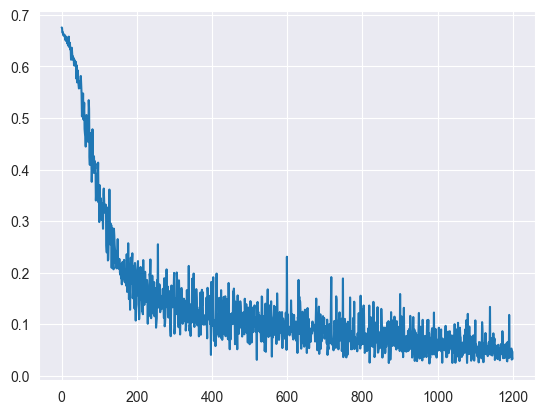

In [25]:
pd.Series(losses).plot()

In [26]:
torch.save(model.state_dict(), "review_classifier.bin")

In [27]:
state_dict = torch.load("review_classifier.bin")

In [28]:
model = ReviewClassifier()
model.load_state_dict(state_dict)

<All keys matched successfully>

### Metric value of our model performance

In [29]:
print(metric_value)

tensor(0.9300)
